In [8]:
import mosfit
import numpy as np
import time

# Test running the fitter.
tic = time.perf_counter()
my_fitter = mosfit.fitter.Fitter(limiting_magnitude=None, quiet=False, test=True, offline=False)
# my_fitter = mosfit.fitter.Fitter(quiet=False, test=True, offline=False)
# {"texplosion":-0.01, "lumdist": 40, "redshift": 0.001,\
#                                               "Mchirp": 1.188, "q": 0.92, "disk_frac": 0.15, "cos_theta": 0.5,\
#                                               "cos_theta_cocoon": 0.5}

toc = time.perf_counter()
print("Process took", toc-tic, "to complete")

# print('Model WAICs: ',
#       [[y['models'][0]['score']['value'] for y in x] for x in entries])

# Test a single call to the model.
# print('Testing single call to Model.likelihood().')
# my_fetcher = mosfit.fetcher.Fetcher()

# fetched = my_fetcher.fetch('SN2009do')[0]

# my_model = mosfit.model.Model(model='bns_generative')

# my_model.load_data(my_fetcher.load_data(fetched), event_name=fetched['name'])

# x = np.random.rand(my_model.get_num_free_parameters())
# likelihood = my_model.likelihood(x)

# print('Model likelihood: `{}`'.format(likelihood))

# outputs = my_model.run(x)

# print('Keys in output: `{}`'.format(', '.join(list(outputs.keys()))))

Process took 0.0011711000001923821 to complete


In [9]:
tic = time.perf_counter()
print('Running `fit_events` test.')
entries, ps, lnprobs = my_fitter.fit_events(events=[], models=['bns_generative'], \
                        max_time=4, band_list="z", band_systems="AB", iterations=0, num_walkers=1,\
                        smooth_times=4, suffix="jupyter_test",\
                        user_fixed_parameters=["texplosion", -0.01, "ebv", 2.2, "lumdist", 400, "redshift", 0.9,\
                                              "Mchirp", 1.188, "q", 0.92, "disk_frac", 0.15, "cos_theta", 0.5,\
                                              "cos_theta_cocoon", 0.5], quiet=True)

toc = time.perf_counter()
print("Process took", toc-tic, "to complete")

Running `fit_events` test.

Basic model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\model.json
Model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\bns_generative\bns_generative.json
Parameter file:
  models\bns_generative\parameters.json
No event specified, generating dummy data.

Loading data...

Loading module `transient` [ 0% ]
Constructing observation array [ 0.0% ]
Constructing observation array [ 25.0% ]
Constructing observation array [ 50.0% ]
Constructing observation array [ 75.0% ]

Loading module `lumdist` [ 2% ]

Loading module `redshift` [ 3% ]

Loading module `alltimes` [ 5% ]

Loading module `texplosion` [ 7% ]

Loading module `resttimes` [ 8% ]

Loading module `Mchirp` [ 10% ]

Loading module `q` [ 12% ]

Loading module `disk_frac` [ 13% ]

Loading module `radius_ns` [ 15% ]

Loading module `alpha` [ 17% ]

Loading module `Mtov` [ 18% ]

Loading module `errMdyn` [ 20% ]

Loading module `errMdisk` [ 22% ]

Loading mo

In [6]:
tic = time.perf_counter()
print('Running `fit_events` test.')
entries, ps, lnprobs = my_fitter.fit_events(events=[], models=['bns_generative'], \
                        max_time=4, band_list="z", band_systems="AB", iterations=0, num_walkers=1,\
                        smooth_times=100, suffix="jupyter_test",\
                        user_fixed_parameters=["texplosion", -0.01, "ebv", 2.2, "lumdist", 40, "redshift", 0.001,\
                                              "Mchirp", 1.188, "q", 0.92, "disk_frac", 0.15, "cos_theta", 0.5,\
                                              "cos_theta_cocoon", 0.5], quiet=True)

toc = time.perf_counter()
print("Process took", toc-tic, "to complete")

Running `fit_events` test.

Basic model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\model.json
Model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\bns_generative\bns_generative.json
Parameter file:
  models\bns_generative\parameters.json
No event specified, generating dummy data.

Loading data...

Loading module `transient` [ 0% ]
Constructing observation array [ 0.0% ]
Constructing observation array [ 1.0% ]
Constructing observation array [ 2.0% ]
Constructing observation array [ 3.0% ]
Constructing observation array [ 4.0% ]
Constructing observation array [ 5.0% ]
Constructing observation array [ 6.0% ]
Constructing observation array [ 7.0% ]
Constructing observation array [ 8.0% ]
Constructing observation array [ 9.0% ]
Constructing observation array [ 10.0% ]
Constructing observation array [ 11.0% ]
Constructing observation array [ 12.0% ]
Constructing observation array [ 13.0% ]
Constructing observation array [ 14.0% ]
Constr

In [288]:
# print(entries[0][0]['models'][0]['setup']['ebv'])

In [289]:
# print(entries[0][0]['photometry'][0])
# print(entries[0][0]['photometry'][1])
n = len(entries[0][0]['photometry'])

In [290]:
# print([entries[0][0]['photometry'][i]['magnitude'] for i in range(0,n)])

In [291]:
# print([entries[0][0]['photometry'][i]['system'] for i in range(0,n)])

In [10]:
obs_mags = []
for entry in entries[0][0]['photometry']:
    if entry['system'] == 'AB':
        obs_mags += [float(entry['magnitude'])]

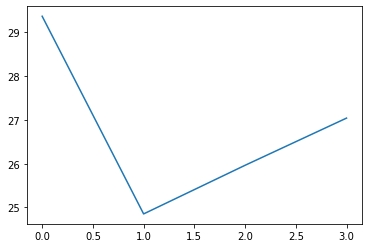

In [11]:
import matplotlib.pyplot as plt
plt.plot(obs_mags)
plt.show()

Hereforth we produce multiple light curves where we vary distance and observation angle to demonstrate how magnitude cutoffs are affected.

In [2]:
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as u
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 15

In [3]:
u1 = cosmo.FlatLambdaCDM(60, 0.27)
u2 = cosmo.FlatLambdaCDM(70, 0.27)
u3 = cosmo.FlatLambdaCDM(80, 0.27)
z = 0.031
d1 = u1.luminosity_distance(z).value
d2 = u2.luminosity_distance(z).value
d3 = u3.luminosity_distance(z).value

In [5]:
# par_pairs = [[0.1, d1],[0.3, d1],[0.5, d1],[0.7, d1], [0.9, d1],
#             [0.1, d2],[0.3, d2],[0.5, d2],[0.7, d2], [0.9, d2],
#             [0.1, d3],[0.3, d3],[0.5, d3],[0.7, d3], [0.9, d3]]
par_pairs = [[0.1, d1],[0.5, d1],[0.9, d1],
            [0.1, d2],[0.5, d2],[0.9, d2],
            [0.1, d3],[0.5, d3],[0.9, d3]]
extra_mjds = list(np.linspace(0,4,100))

In [6]:
entries_list = []
# my_fitter = mosfit.fitter.Fitter(limiting_magnitude=23.3, quiet=False, test=True, offline=False)
my_fitter = mosfit.fitter.Fitter(quiet=False, test=True, offline=False)
for i in range(len(par_pairs)):
    entries, ps, lnprobs = my_fitter.fit_events(events=[], models=['bns_generative'], \
                        max_time=4, band_list="z", band_systems="AB", iterations=0, num_walkers=1,\
                        smooth_times=100, suffix="jupyter_test",\
                        user_fixed_parameters=["texplosion", -0.01, "ebv", 2.2, "lumdist", par_pairs[i][1], "redshift", z,\
                                              "Mchirp", 1.188, "q", 0.92, "disk_frac", 0.15, "cos_theta", par_pairs[i][0],\
                                              "cos_theta_cocoon", 0.5], quiet=True)
    entries_list.append([entries])


Basic model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\model.json
Model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\bns_generative\bns_generative.json
Parameter file:
  models\bns_generative\parameters.json
No event specified, generating dummy data.

Loading data...

Loading module `transient` [ 0% ]
Constructing observation array [ 0.0% ]
Constructing observation array [ 1.0% ]
Constructing observation array [ 2.0% ]
Constructing observation array [ 3.0% ]
Constructing observation array [ 4.0% ]
Constructing observation array [ 5.0% ]
Constructing observation array [ 6.0% ]
Constructing observation array [ 7.0% ]
Constructing observation array [ 8.0% ]
Constructing observation array [ 9.0% ]
Constructing observation array [ 10.0% ]
Constructing observation array [ 11.0% ]
Constructing observation array [ 12.0% ]
Constructing observation array [ 13.0% ]
Constructing observation array [ 14.0% ]
Constructing observation array [ 

Constructing observation array [ 24.0% ]
Constructing observation array [ 25.0% ]
Constructing observation array [ 26.0% ]
Constructing observation array [ 27.0% ]
Constructing observation array [ 28.0% ]
Constructing observation array [ 29.0% ]
Constructing observation array [ 30.0% ]
Constructing observation array [ 31.0% ]
Constructing observation array [ 32.0% ]
Constructing observation array [ 33.0% ]
Constructing observation array [ 34.0% ]
Constructing observation array [ 35.0% ]
Constructing observation array [ 36.0% ]
Constructing observation array [ 37.0% ]
Constructing observation array [ 38.0% ]
Constructing observation array [ 39.0% ]
Constructing observation array [ 40.0% ]
Constructing observation array [ 41.0% ]
Constructing observation array [ 42.0% ]
Constructing observation array [ 43.0% ]
Constructing observation array [ 44.0% ]
Constructing observation array [ 45.0% ]
Constructing observation array [ 46.0% ]
Constructing observation array [ 47.0% ]
Constructing obs

Constructing observation array [ 57.0% ]
Constructing observation array [ 58.0% ]
Constructing observation array [ 59.0% ]
Constructing observation array [ 60.0% ]
Constructing observation array [ 61.0% ]
Constructing observation array [ 62.0% ]
Constructing observation array [ 63.0% ]
Constructing observation array [ 64.0% ]
Constructing observation array [ 65.0% ]
Constructing observation array [ 66.0% ]
Constructing observation array [ 67.0% ]
Constructing observation array [ 68.0% ]
Constructing observation array [ 69.0% ]
Constructing observation array [ 70.0% ]
Constructing observation array [ 71.0% ]
Constructing observation array [ 72.0% ]
Constructing observation array [ 73.0% ]
Constructing observation array [ 74.0% ]
Constructing observation array [ 75.0% ]
Constructing observation array [ 76.0% ]
Constructing observation array [ 77.0% ]
Constructing observation array [ 78.0% ]
Constructing observation array [ 79.0% ]
Constructing observation array [ 80.0% ]
Constructing obs

Constructing observation array [ 90.0% ]
Constructing observation array [ 91.0% ]
Constructing observation array [ 92.0% ]
Constructing observation array [ 93.0% ]
Constructing observation array [ 94.0% ]
Constructing observation array [ 95.0% ]
Constructing observation array [ 96.0% ]
Constructing observation array [ 97.0% ]
Constructing observation array [ 98.0% ]
Constructing observation array [ 99.0% ]

Loading module `lumdist` [ 2% ]

Loading module `redshift` [ 3% ]

Loading module `alltimes` [ 5% ]

Loading module `texplosion` [ 7% ]

Loading module `resttimes` [ 8% ]

Loading module `Mchirp` [ 10% ]

Loading module `q` [ 12% ]

Loading module `disk_frac` [ 13% ]

Loading module `radius_ns` [ 15% ]

Loading module `alpha` [ 17% ]

Loading module `Mtov` [ 18% ]

Loading module `errMdyn` [ 20% ]

Loading module `errMdisk` [ 22% ]

Loading module `densetimes` [ 23% ]

Loading module `frad` [ 25% ]

Loading module `kappa_blue` [ 27% ]

Loading module `cos_theta` [ 28% ]

Loading mod


Loading module `shock_cocoon` [ 45% ]

Loading module `rprocess` [ 47% ]

Loading module `temperature` [ 48% ]

Loading module `temperature_floor` [ 50% ]

Loading module `diffusion_aspherical` [ 52% ]

Loading module `rprocess2` [ 53% ]

Loading module `blackbody` [ 55% ]

Loading module `temperature_floor1` [ 57% ]

Loading module `diffusion2` [ 58% ]

Loading module `rprocess3` [ 60% ]

Loading module `blackbody1` [ 62% ]

Loading module `temperature_floor2` [ 63% ]

Loading module `diffusion3` [ 65% ]

Loading module `blackbody2` [ 67% ]

Loading module `temperature_floor3` [ 68% ]

Loading module `ebv` [ 70% ]

Loading module `rvhost` [ 72% ]

Loading module `nhhost` [ 73% ]

Loading module `blackbody3` [ 75% ]

Loading module `losextinction` [ 77% ]

Loading module `default_upper_limit_error` [ 78% ]

Loading module `default_no_error_bar_error` [ 80% ]

Loading module `variance` [ 82% ]

Loading module `codeltatime` [ 83% ]

Loading module `codeltalambda` [ 85% ]

Loading module

  SLOAN/SDSS.z [System: AB]

2 measurements, 0 free parameters.
Initial draws completed!

Constructing output...
All walkers written.

Basic model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\model.json
Model file:
  C:\Users\sgagn\Anaconda3\envs\kn\Lib\site-packages\mosfit\models\bns_generative\bns_generative.json
Parameter file:
  models\bns_generative\parameters.json
No event specified, generating dummy data.

Loading data...

Loading module `transient` [ 0% ]
Constructing observation array [ 0.0% ]
Constructing observation array [ 1.0% ]
Constructing observation array [ 2.0% ]
Constructing observation array [ 3.0% ]
Constructing observation array [ 4.0% ]
Constructing observation array [ 5.0% ]
Constructing observation array [ 6.0% ]
Constructing observation array [ 7.0% ]
Constructing observation array [ 8.0% ]
Constructing observation array [ 9.0% ]
Constructing observation array [ 10.0% ]
Constructing observation array [ 11.0% ]
Constructing observati

Constructing observation array [ 21.0% ]
Constructing observation array [ 22.0% ]
Constructing observation array [ 23.0% ]
Constructing observation array [ 24.0% ]
Constructing observation array [ 25.0% ]
Constructing observation array [ 26.0% ]
Constructing observation array [ 27.0% ]
Constructing observation array [ 28.0% ]
Constructing observation array [ 29.0% ]
Constructing observation array [ 30.0% ]
Constructing observation array [ 31.0% ]
Constructing observation array [ 32.0% ]
Constructing observation array [ 33.0% ]
Constructing observation array [ 34.0% ]
Constructing observation array [ 35.0% ]
Constructing observation array [ 36.0% ]
Constructing observation array [ 37.0% ]
Constructing observation array [ 38.0% ]
Constructing observation array [ 39.0% ]
Constructing observation array [ 40.0% ]
Constructing observation array [ 41.0% ]
Constructing observation array [ 42.0% ]
Constructing observation array [ 43.0% ]
Constructing observation array [ 44.0% ]
Constructing obs

Constructing observation array [ 54.0% ]
Constructing observation array [ 55.0% ]
Constructing observation array [ 56.0% ]
Constructing observation array [ 57.0% ]
Constructing observation array [ 58.0% ]
Constructing observation array [ 59.0% ]
Constructing observation array [ 60.0% ]
Constructing observation array [ 61.0% ]
Constructing observation array [ 62.0% ]
Constructing observation array [ 63.0% ]
Constructing observation array [ 64.0% ]
Constructing observation array [ 65.0% ]
Constructing observation array [ 66.0% ]
Constructing observation array [ 67.0% ]
Constructing observation array [ 68.0% ]
Constructing observation array [ 69.0% ]
Constructing observation array [ 70.0% ]
Constructing observation array [ 71.0% ]
Constructing observation array [ 72.0% ]
Constructing observation array [ 73.0% ]
Constructing observation array [ 74.0% ]
Constructing observation array [ 75.0% ]
Constructing observation array [ 76.0% ]
Constructing observation array [ 77.0% ]
Constructing obs

In [7]:
om_list = []
t_list = []
k = 0
for es in entries_list:
    k += 1
    if isinstance(es[0][0][0], list):
        print("pingas")
        continue
    obs_mags = []
    obs_times = []
    ep = es[0][0][0]['photometry']
    l = len(ep)
    for i in range(l):
        s = ep[i]['system']
        if s == 'AB':
            obs_mags += [float(ep[i]['magnitude'])]
            obs_times += [float(ep[i]['time'])]
    om_list += [obs_mags]
    t_list += [obs_times]

In [8]:
l = len(om_list)
f_list = []
for i in range(l):
    o = np.array(om_list[i])
    f_list += [10**((9.5 - o)/2.5)]
    
f_lim = 10**((9.5 - 23.3)/2.5)
print(f_lim)

3.019951720402013e-06


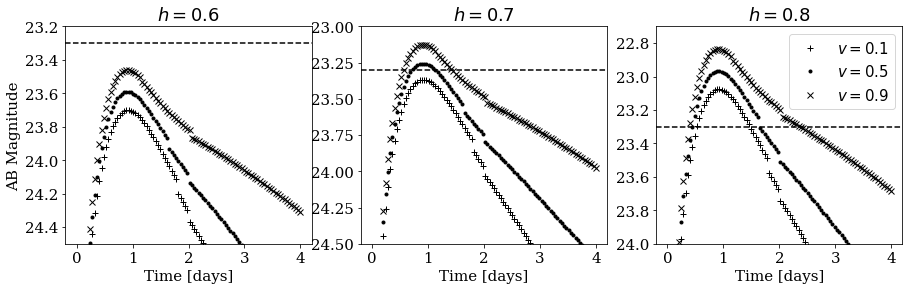

In [15]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].set_ylim(23.2,24.5)
ax[1].set_ylim(23,24.5)
ax[2].set_ylim(22.7,24)
ax[0].set_title("$h=0.6$")
ax[1].set_title("$h=0.7$")
ax[2].set_title("$h=0.8$")
# ax[0].axhline(f_lim)
# ax[1].axhline(f_lim)
# ax[2].axhline(f_lim)
ax[0].axhline(23.3, color='k', linestyle='--')
ax[1].axhline(23.3, color='k', linestyle='--')
ax[2].axhline(23.3, color='k', linestyle='--')
ax[0].set_ylabel("AB Magnitude")
ax[0].set_xlabel("Time [days]")
ax[1].set_xlabel("Time [days]")
ax[2].set_xlabel("Time [days]")
lc = ['+k', '.k', 'xk']
ll = ['$v=0.1$', '$v=0.5$', '$v=0.9$']
for i in range(len(om_list)):
    if i<3:
#         ax[0].plot(t_list[i], f_list[i], lc[i%3])
        ax[0].plot(t_list[i], om_list[i], lc[i%3])
    elif i<6:
#         ax[1].plot(t_list[i], f_list[i], lc[i%3])
        ax[1].plot(t_list[i], om_list[i], lc[i%3])
    else:
#         ax[2].plot(t_list[i], f_list[i], lc[i%3])
        ax[2].plot(t_list[i], om_list[i], lc[i%3], label=ll[i%3])
ax[2].legend()
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()
plt.show()

In [10]:
len(entries_list)

9

In [11]:
print(entries_list[0][0][0][0]['photometry'])

[OrderedDict([('time', '0.0'), ('band', 'z'), ('e_magnitude', '0.001'), ('magnitude', '28.543347792061784'), ('realization', '1'), ('system', 'A'), ('u_time', 'MJD'), ('model', '1'), ('source', '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,2,20,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,3,21,19')]), OrderedDict([('time', '0.0'), ('band', 'z'), ('e_magnitude', '0.001'), ('magnitude', '28.543347792061784'), ('realization', '1'), ('system', 'AB'), ('u_time', 'MJD'), ('model', '1'), ('source', '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,2,20,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,3,21,19')]), OrderedDict([('time', '0.04040404040404041'), ('band', 'z'), ('e_magnitude', '0.001'), ('magnitude', '26.47686129818622'), ('realization', '1'), ('system', 'A'), ('u_time', 'MJD'), ('model', '1'), ('source', '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,2,20,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,3,21,19')]), OrderedDict([('time', '0.04040404040404041'), ('band', 'z')